<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/ale/TALLER/EVALUACION/HANCCO_VARGAS_ALEXANDRA_ADELA_PARTE01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#An√°lisis y Preparaci√≥n de Datos

In [8]:
import pandas as pd

# Cargar los archivos TXT (usamos separador por defecto si es CSV plano)
df1 = pd.read_csv('/content/index_1.csv')  # Aseg√∫rate de subir este archivo
df2 = pd.read_csv('/content/index_2.csv')

# Unir los datasets
df = pd.concat([df1, df2], ignore_index=True)

# Ver las primeras filas
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   card         3547 non-null   object 
 4   money        3898 non-null   float64
 5   coffee_name  3898 non-null   object 
dtypes: float64(1), object(5)
memory usage: 182.8+ KB
None


date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte

In [27]:
#Conversi√≥n de columnas de fecha/hora
# Convertir columnas date y datetime a formato datetime (manejo de errores y formatos mixtos)
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed', errors='coerce')
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

# Eliminar filas con errores en fecha
df = df.dropna(subset=['datetime', 'date'])

# Confirmar
df[['date', 'datetime']].head()


date                datetime
0 2024-03-01 2024-03-01 10:15:50.520
1 2024-03-01 2024-03-01 12:19:22.539
2 2024-03-01 2024-03-01 12:20:18.089
3 2024-03-01 2024-03-01 13:46:33.006
4 2024-03-01 2024-03-01 13:48:14.626

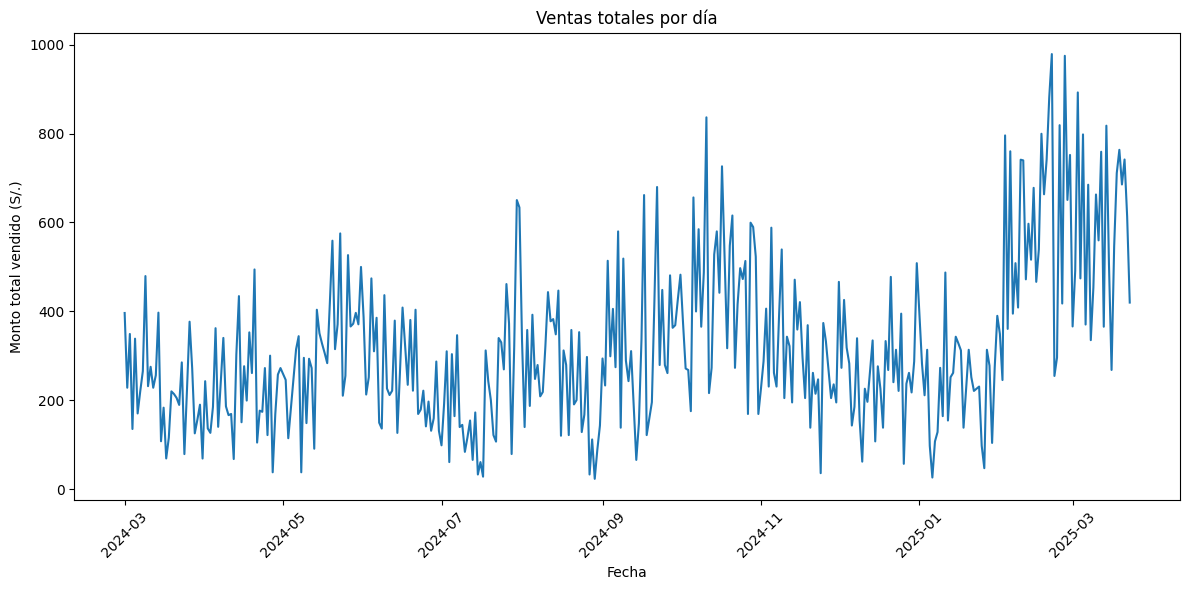

In [11]:
# An√°lisis Exploratorio de Datos (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Total de dinero vendido por d√≠a
ventas_diarias = df.groupby('date')['money'].sum().reset_index()

# Gr√°fico de l√≠nea
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='money', data=ventas_diarias)
plt.title('Ventas totales por d√≠a')
plt.xlabel('Fecha')
plt.ylabel('Monto total vendido (S/.)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Ingenier√≠a de Caracter√≠sticas
# Extraer mes, d√≠a de la semana, hora
df['mes'] = df['datetime'].dt.month
df['dia_semana'] = df['datetime'].dt.dayofweek  # 0 = lunes
df['hora'] = df['datetime'].dt.hour

# Crear variable de objetivo: cantidad_total_vendida_no_dia
ventas_por_dia = df.groupby('date')['money'].sum().reset_index()
ventas_por_dia.rename(columns={'money': 'cantidad_total_vendida_no_dia'}, inplace=True)

# Unir esta columna al dataset original
df = df.merge(ventas_por_dia, on='date', how='left')

# Codificar variables categ√≥ricas (One-Hot Encoding)
df_dummies = pd.get_dummies(df[['coffee_name', 'cash_type']], drop_first=True)

# Crear conjunto de datos final
df_final = pd.concat([
    df[['mes', 'dia_semana', 'hora']],
    df_dummies,
    df[['cantidad_total_vendida_no_dia']]
], axis=1)

df_final.head()


mes  dia_semana  hora  coffee_name_Americano with Milk  \
0    3           4    10                            False   
1    3           4    12                            False   
2    3           4    12                            False   
3    3           4    13                            False   
4    3           4    13                            False   

   coffee_name_Americano with milk  coffee_name_Cappuccino  \
0                            False                   False   
1                            False                   False   
2                            False                   False   
3                            False                   False   
4                            False                   False   

   coffee_name_Caramel  coffee_name_Caramel coffee  \
0                False                       False   
1                False                       False   
2                False                       False   
3                False                       False   
4                False                       False   

   coffee_name_Caramel with Irish whiskey  coffee_name_Caramel with chocolate  \
0                                   False                               False   
1                                   False                               False   
2                                   False                               False   
3                                   False                               False   
4                                   False                               False   

   ...  coffee_name_Irish whiskey with milk  coffee_name_Irish with chocolate  \
0  ...                                False                             False   
1  ...                                False                             False   
2  ...                                False                             False   
3  ...                                False                             False   
4  ...                                False                             False   

   coffee_name_Latte  coffee_name_Mochaccino  coffee_name_Super chocolate  \
0               True                   False                        False   
1              False                   False                        False   
2              False                   False                        False   
3              False                   False                        False   
4               True                   False                        False   

   coffee_name_Tea  coffee_name_Vanilla coffee  \
0            False                       False   
1            False                       False   
2            False                       False   
3            False                       False   
4            False                       False   

   coffee_name_Vanilla with Irish whiskey  cash_type_cash  \
0                                   False           False   
1                                   False           False   
2                                   False           False   
3                                   False           False   
4                                   False           False   

   cantidad_total_vendida_no_dia  
0                          396.3  
1                          396.3  
2                          396.3  
3                          396.3  
4                          396.3  

[5 rows x 38 columns]

In [13]:
#Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar variables (X) y objetivo (y)
X = df_final.drop('cantidad_total_vendida_no_dia', axis=1)
y = df_final['cantidad_total_vendida_no_dia']

# Escalar las caracter√≠sticas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Confirmar formas
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)


X_train: (3118, 37)
X_test: (780, 37)
y_train: (3118,)


# Modelado Predictivo (con TensorFlow Keras)

Modelo 1 ‚Äì Predecir cantidad_total_vendida_no_dia

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model_total = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Regresi√≥n: 1 sola salida
])

# Compilar el modelo
model_total.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar
history_total = model_total.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - loss: 224352.7969 - mae: 427.9987 - val_loss: 221606.6719 - val_mae: 422.2959
Epoch 2/50
78/78 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 214542.7656 - mae: 415.2280 - val_loss: 183393.9688 - val_mae: 376.9490
Epoch 3/50
78/78 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 160666.4375 - mae: 348.3126 - val_loss: 105799.3203 - val_mae: 265.1060
Epoch 4/50
78/78 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 85357.2266 - mae: 232.0383 - val_loss: 49756.2930 - val_mae: 174.3337
Epoch 5/50
78/78 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 42913.5234 - mae: 160.5171 - val_loss: 40928.6211 - val_mae: 163.9169
Epoch 6/50
78/78 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 36463.6680 - mae: 154.4281 - val_loss: 40345.6406 - val_mae: 163.68

 Evaluar el Modelo

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predecir
y_pred_total = model_total.predict(X_test)

# Calcular m√©tricas
mae = mean_absolute_error(y_test, y_pred_total)
mse = mean_squared_error(y_test, y_pred_total)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_total)

print(f"üîé Evaluaci√≥n del Modelo Total:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R¬≤: {r2:.2f}")


25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
üîé Evaluaci√≥n del Modelo Total:
MAE: 167.06
MSE: 41004.46
RMSE: 202.50
R¬≤: 0.12


Modelo 2 ‚Äì Predecir cantidad vendida por coffee_name (multi-output)

In [16]:
# Agrupar por d√≠a y caf√© para contar cu√°ntas unidades se vendieron por d√≠a y tipo
ventas_cafe = df.groupby(['date', 'coffee_name'])['money'].count().unstack().fillna(0).reset_index()

# A√±adir caracter√≠sticas temporales
info_fecha = df[['date', 'mes', 'dia_semana', 'hora']].drop_duplicates()
df_cafe = pd.merge(ventas_cafe, info_fecha, on='date')

# Definir variables
X_cafe = df_cafe[['mes', 'dia_semana', 'hora']]
y_cafe = df_cafe.drop(columns=['date', 'mes', 'dia_semana', 'hora'])

# Escalar X
X_cafe_scaled = scaler.fit_transform(X_cafe)

# Dividir
X_train_cafe, X_test_cafe, y_train_cafe, y_test_cafe = train_test_split(X_cafe_scaled, y_cafe, test_size=0.2, random_state=42)


Crear y entrenar el modelo multi-output

In [17]:
# Definir modelo multi-output
model_cafe = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_cafe.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train_cafe.shape[1])  # tantas salidas como tipos de caf√©
])

model_cafe.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar modelo
history_cafe = model_cafe.fit(X_train_cafe, y_train_cafe, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - loss: 1.2258 - mae: 0.4564 - val_loss: 0.9838 - val_mae: 0.4230
Epoch 2/50
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.8400 - mae: 0.3901 - val_loss: 0.6503 - val_mae: 0.3589
Epoch 3/50
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 0.6326 - mae: 0.3498 - val_loss: 0.6129 - val_mae: 0.3411
Epoch 4/50
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.5990 - mae: 0.3340 - val_loss: 0.6054 - val_mae: 0.3380
Epoch 5/50
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.5995 - mae: 0.3286 - val_loss: 0.6020 - val_mae: 0.3381
Epoch 6/50
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.5787 - mae: 0.3261 - val_loss: 0.5988 - val_mae: 0.3359
Epoch 7/50
44/44 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

Evaluar modelo multi-output

In [18]:
# Predicci√≥n
y_pred_cafe = model_cafe.predict(X_test_cafe)

# M√©tricas para cada tipo de caf√©
for i, nombre in enumerate(y_cafe.columns):
    mae_c = mean_absolute_error(y_test_cafe.iloc[:, i], y_pred_cafe[:, i])
    mse_c = mean_squared_error(y_test_cafe.iloc[:, i], y_pred_cafe[:, i])
    rmse_c = np.sqrt(mse_c)
    r2_c = r2_score(y_test_cafe.iloc[:, i], y_pred_cafe[:, i])

    print(f"\n‚òï Evaluaci√≥n para {nombre}:")
    print(f"MAE: {mae_c:.2f} | MSE: {mse_c:.2f} | RMSE: {rmse_c:.2f} | R¬≤: {r2_c:.2f}")


14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step 

‚òï Evaluaci√≥n para Americano:
MAE: 1.48 | MSE: 4.00 | RMSE: 2.00 | R¬≤: 0.28

‚òï Evaluaci√≥n para Americano with Milk:
MAE: 1.53 | MSE: 4.10 | RMSE: 2.02 | R¬≤: 0.06

‚òï Evaluaci√≥n para Americano with milk:
MAE: 0.31 | MSE: 0.32 | RMSE: 0.56 | R¬≤: 0.23

‚òï Evaluaci√≥n para Cappuccino:
MAE: 1.09 | MSE: 1.85 | RMSE: 1.36 | R¬≤: 0.01

‚òï Evaluaci√≥n para Caramel:
MAE: 0.03 | MSE: 0.01 | RMSE: 0.10 | R¬≤: -0.00

‚òï Evaluaci√≥n para Caramel coffee:
MAE: 0.03 | MSE: 0.00 | RMSE: 0.06 | R¬≤: -0.46

‚òï Evaluaci√≥n para Caramel with Irish whiskey:
MAE: 0.11 | MSE: 0.05 | RMSE: 0.22 | R¬≤: 0.05

‚òï Evaluaci√≥n para Caramel with chocolate:
MAE: 0.04 | MSE: 0.01 | RMSE: 0.10 | R¬≤: -0.06

‚òï Evaluaci√≥n para Caramel with milk:
MAE: 0.04 | MSE: 0.01 | RMSE: 0.11 | R¬≤: 0.02

‚òï Evaluaci√≥n para Chocolate:
MAE: 0.03 | MSE: 0.00 | RMSE: 0.06 | R¬≤: -0.36

‚òï Evaluaci√≥n para Chocolate with coffee:
MAE: 0.04

# GR√ÅFICOS ‚Äì Visualizaci√≥n del rendimiento

P√©rdida del modelo total (entrenamiento)

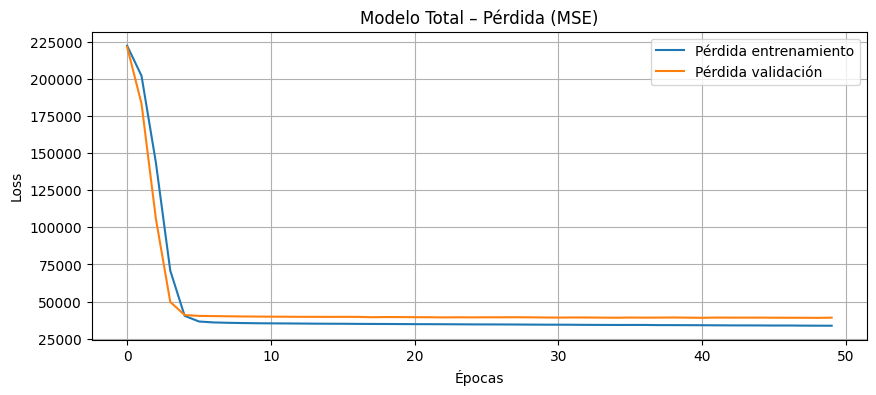

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history_total.history['loss'], label='P√©rdida entrenamiento')
plt.plot(history_total.history['val_loss'], label='P√©rdida validaci√≥n')
plt.title('Modelo Total ‚Äì P√©rdida (MSE)')
plt.xlabel('√âpocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


P√©rdida del modelo multi-output (caf√© por tipo)

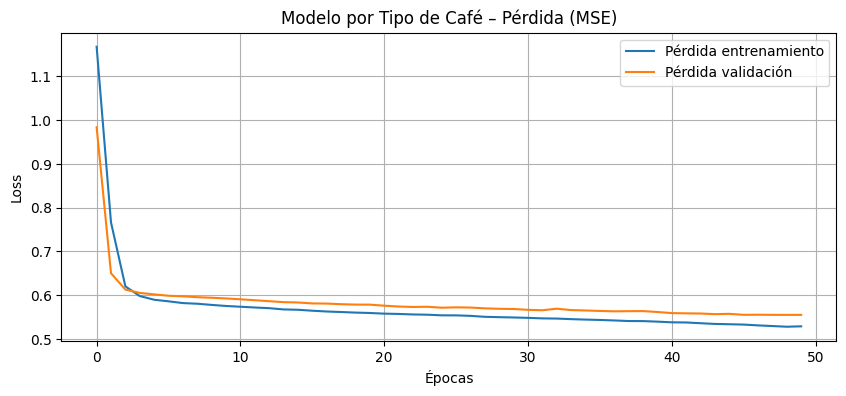

In [20]:
plt.figure(figsize=(10,4))
plt.plot(history_cafe.history['loss'], label='P√©rdida entrenamiento')
plt.plot(history_cafe.history['val_loss'], label='P√©rdida validaci√≥n')
plt.title('Modelo por Tipo de Caf√© ‚Äì P√©rdida (MSE)')
plt.xlabel('√âpocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Guardar modelos como archivos .h5
model_total.save("modelo_total.h5")
model_cafe.save("modelo_cafe.h5")


In [25]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [26]:
from google.colab import files

# Descargar los modelos y el escalador
files.download("modelo_total.h5")
files.download("modelo_cafe.h5")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>